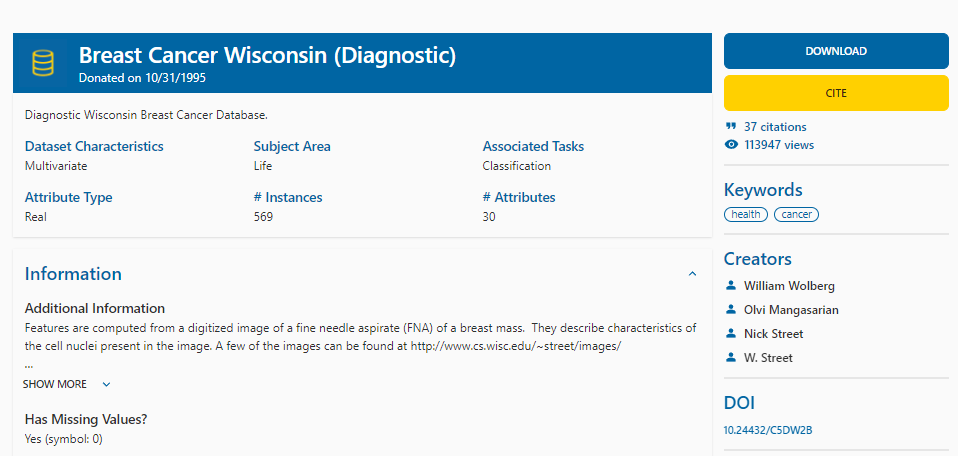

**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation) , [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

#### **Task:**   
The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### **Dataset available on:** [UCI Machine Learning Breast Cancer Wisconsin](http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic), [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

### **Imports**

In [1]:
import pandas as pd # wrangling the data
from sklearn.preprocessing import MinMaxScaler # standardising the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encoding the data in to numerical values from strings
from sklearn import svm, datasets  # the svm and datasets for the algorithm classifier
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics

### **Loading the database**

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
Breast_Cancer_Wisconsin = pd.read_csv('data.csv')

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
Breast_Cancer_Wisconsin.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# show the column names
Breast_Cancer_Wisconsin.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# shape of the data
Breast_Cancer_Wisconsin.shape

(569, 33)

In [6]:
# check for missing values
Breast_Cancer_Wisconsin.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### **Drop useless columns:**

In [7]:
# drop useless columns like 'Unnamed: 32', 'id
Breast_Cancer_Wisconsin.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [8]:
# check for missing values
Breast_Cancer_Wisconsin.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### **Now we have clean the dataset no missing values and useless columns.**

In [9]:
# show the distribution of the target variable data
Breast_Cancer_Wisconsin['diagnosis'].value_counts(normalize=True)



B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [10]:
# create a copy of the dataset for visualization purpose
Breast_Cancer_Wisconsi_df = Breast_Cancer_Wisconsin.copy()
Breast_Cancer_Wisconsi_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### **Check datatypes:**

In [11]:
Breast_Cancer_Wisconsi_df.dtypes # check datatypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

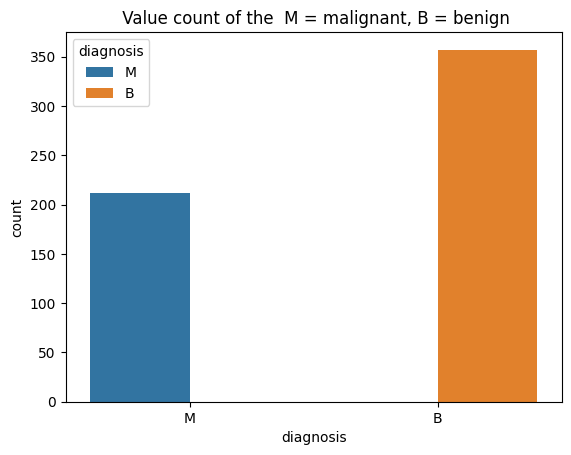

In [12]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=Breast_Cancer_Wisconsi_df, x="diagnosis", hue="diagnosis").set(title = " Value count of the  M = malignant, B = benign");

## **Preprocessing:**

#### **Define the target and the inputs**

In [13]:
target = Breast_Cancer_Wisconsi_df['diagnosis'] # value to be predicted
inputs = Breast_Cancer_Wisconsi_df.drop(['diagnosis'], axis = 1 ) # drop the target column

#### **Now let's change the values of malignant to 1 (infectous)  and benign 0 (not so harmful)**

In [14]:
target = target.replace('M','1') # malignant to 1 (dangerous, harmful)
target = target.replace('B','0') # benign to 0 (not so harmful)
target = target.astype(int) # convert to type int

#### **Create a training and a testing dataset**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(inputs, # independent or x values
                                                    target, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = target   # get a balance both in the training and test set
                                                      )

#### **Check the result from the stratification**

In [16]:
# let see the training distribution after train_test_split
y_train.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

In [17]:
# let see the testing distribution after train_test_split
y_test.value_counts()

0    72
1    42
Name: diagnosis, dtype: int64

### **Rescaling**

**In order for the SVC to work correctly the inputs need to be rescaled to the range(-1,1)**

In [18]:
scaling = MinMaxScaler().fit(x_train) # scaling the training set
x_train_rescaled = scaling.transform(x_train) # transform the scaled data

#### **Classification**

**Radial Basis Function Kernel (RBF):**

In [19]:
svc = svm.SVC(C = 100, gamma=1, kernel='rbf').fit(x_train_rescaled, y_train) # fit the model on the x_train_rescaled, y_train

In [20]:
y_pred_test = svc.predict(scaling.transform(x_test)) # predict test transform

### **Model Evaluation:**

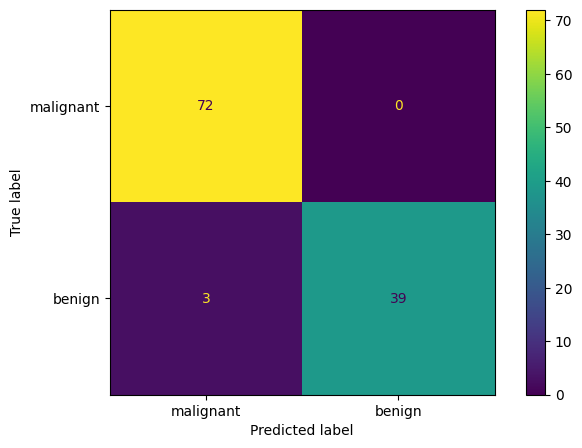

In [21]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=['malignant', "benign"]
)

cmp.plot(ax=ax);

In [22]:
# print a summary classification_report
print(classification_report(y_test, y_pred_test, target_names = ['malignant', "benign"]))

              precision    recall  f1-score   support

   malignant       0.96      1.00      0.98        72
      benign       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

